### In this notebook we will explore the differences between softmax and log softmax

since we're using softmax and log softmax, this should be a classification problem with muliple target classes

some articles
* [log softmax vs softmax](https://deepdatascience.wordpress.com/2020/02/27/log-softmax-vs-softmax/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

#### let's test a few examples. we'll find the softmax and the log softmax on the same set of data and compare the results

!! note that x1 is just one vector, which is why dim=0 when we're finding softmax and log softmax. so the activations are applied to just one scalar. this corresponds to just one output neuron, but softmax and log softmax never has just one final neuron. These examples should not be thought of from a NN perspective. This is just to understand the differences in the outputs of softmax and log softmax. softmax returns the probability distribution while log softmax returns the log probability distribution. it does not make sense to get a distribution from a scalar. 

#### example 1

In [65]:
x1 = np.arange(0,1,0.1)
x1 = torch.from_numpy(x1)
x1

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000], dtype=torch.float64)

In [66]:
softmax1 = F.softmax(x1, dim=0) 
logsoftmax1 = F.log_softmax(x1, dim=0)

In [67]:
softmax1

tensor([0.0612, 0.0676, 0.0748, 0.0826, 0.0913, 0.1009, 0.1115, 0.1233, 0.1362,
        0.1505], dtype=torch.float64)

In [68]:
logsoftmax1

tensor([-2.7935, -2.6935, -2.5935, -2.4935, -2.3935, -2.2935, -2.1935, -2.0935,
        -1.9935, -1.8935], dtype=torch.float64)

x1: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000], dtype=torch.float64)
softmax x1: tensor([0.0612, 0.0676, 0.0748, 0.0826, 0.0913, 0.1009, 0.1115, 0.1233, 0.1362,
        0.1505], dtype=torch.float64)
logsoftmax x1: tensor([-2.7935, -2.6935, -2.5935, -2.4935, -2.3935, -2.2935, -2.1935, -2.0935,
        -1.9935, -1.8935], dtype=torch.float64)


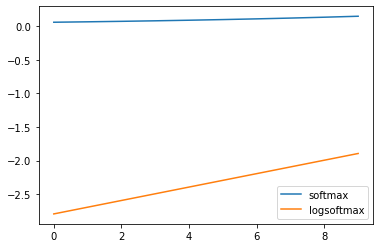

In [69]:
print(f'x1: {x1}')
print(f'softmax x1: {softmax1}')
print(f'logsoftmax x1: {logsoftmax1}')
plt.plot(np.arange(softmax1.shape[0]), softmax1, label='softmax')
plt.plot(np.arange(logsoftmax1.shape[0]), logsoftmax1, label='logsoftmax')
plt.legend()
plt.show()

#### example 2

In [27]:
x2 = np.arange(1,10,1, dtype='float')
x2 = torch.from_numpy(x2)
x2

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64)

In [28]:
softmax2 = F.softmax(x2, dim=0) 
logsoftmax2 = F.log_softmax(x2, dim=0)

In [29]:
softmax2

tensor([2.1208e-04, 5.7649e-04, 1.5671e-03, 4.2597e-03, 1.1579e-02, 3.1475e-02,
        8.5559e-02, 2.3257e-01, 6.3220e-01], dtype=torch.float64)

In [30]:
logsoftmax2

tensor([-8.4586, -7.4586, -6.4586, -5.4586, -4.4586, -3.4586, -2.4586, -1.4586,
        -0.4586], dtype=torch.float64)

x2: tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64)
softmax x2: tensor([2.1208e-04, 5.7649e-04, 1.5671e-03, 4.2597e-03, 1.1579e-02, 3.1475e-02,
        8.5559e-02, 2.3257e-01, 6.3220e-01], dtype=torch.float64)
logsoftmax x2: tensor([-8.4586, -7.4586, -6.4586, -5.4586, -4.4586, -3.4586, -2.4586, -1.4586,
        -0.4586], dtype=torch.float64)


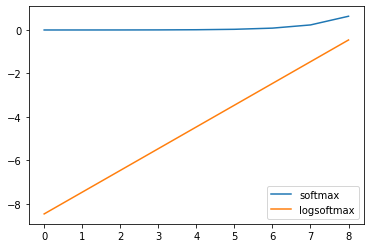

In [62]:
print(f'x2: {x2}')
print(f'softmax x2: {softmax2}')
print(f'logsoftmax x2: {logsoftmax2}')
plt.plot(np.arange(softmax2.shape[0]), softmax2, label='softmax')
plt.plot(np.arange(logsoftmax2.shape[0]), logsoftmax2, label='logsoftmax')
plt.legend()
plt.show()

#### example 3

In [33]:
x3 = np.arange(10,100,10, dtype='float')
x3 = torch.from_numpy(x3)
x3

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float64)

In [34]:
softmax3 = F.softmax(x3, dim=0) 
logsoftmax3 = F.log_softmax(x3, dim=0)

In [35]:
softmax3

tensor([1.8048e-35, 3.9753e-31, 8.7561e-27, 1.9287e-22, 4.2482e-18, 9.3572e-14,
        2.0611e-09, 4.5398e-05, 9.9995e-01], dtype=torch.float64)

In [36]:
logsoftmax3

tensor([-8.0000e+01, -7.0000e+01, -6.0000e+01, -5.0000e+01, -4.0000e+01,
        -3.0000e+01, -2.0000e+01, -1.0000e+01, -4.5401e-05],
       dtype=torch.float64)

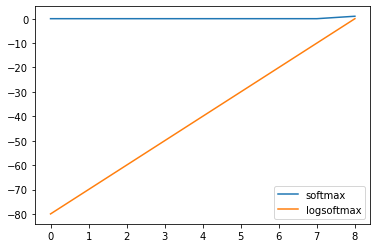

In [37]:
plt.plot(np.arange(softmax3.shape[0]), softmax3, label='softmax')
plt.plot(np.arange(logsoftmax3.shape[0]), logsoftmax3, label='logsoftmax')
plt.legend()
plt.show()

Let's plot them separately to see them better

x3: tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float64)
softmax x3: tensor([1.8048e-35, 3.9753e-31, 8.7561e-27, 1.9287e-22, 4.2482e-18, 9.3572e-14,
        2.0611e-09, 4.5398e-05, 9.9995e-01], dtype=torch.float64)


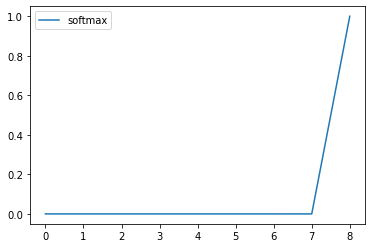

In [40]:
print(f'x3: {x3}')
print(f'softmax x3: {softmax3}')
plt.plot(np.arange(softmax3.shape[0]), softmax3, label='softmax')
plt.legend()

x3: tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float64)
logsoftmax x3: tensor([-8.0000e+01, -7.0000e+01, -6.0000e+01, -5.0000e+01, -4.0000e+01,
        -3.0000e+01, -2.0000e+01, -1.0000e+01, -4.5401e-05],
       dtype=torch.float64)


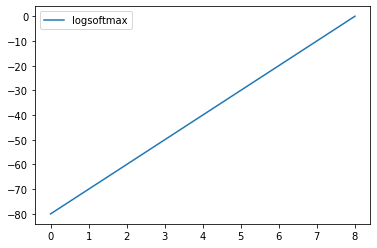

In [41]:
print(f'x3: {x3}')
print(f'logsoftmax x3: {logsoftmax3}')
plt.plot(np.arange(logsoftmax3.shape[0]), logsoftmax3, label='logsoftmax')
plt.legend()

**Note!** in the plots notice the range on the function axis

### inference

* This may not be clear from the plots, but log softmax does not let the probabilities get very small, as it is a log over the probabilities. This ensures numerical stability. (Read the article at the top of the notebook)
<br>
! Again, note that the examples above just compares scalar values and the softmax/logsoftmax returns. It does not return a probability distribution

### Now let's look at a more real world example. ('real world' in the sense that the final layer has multiple neurons)

In [92]:
x = np.random.randn(10,10)
x = torch.from_numpy(x)
x

tensor([[-1.6692,  0.4987,  0.7732, -1.8117,  0.3308, -0.1597,  0.0808, -0.9493,
         -0.0649,  0.1596],
        [-0.1207,  1.1746,  0.0204,  0.6976,  1.2534,  0.7605, -1.1319, -0.3254,
         -0.1384, -1.2878],
        [-0.4379, -1.8328,  0.2415, -0.1660,  0.4439,  1.1693,  0.7686,  1.1547,
         -0.0053,  1.1163],
        [ 1.2533,  0.2560, -0.5316, -0.0137,  0.2485, -1.0182,  0.1801, -0.9207,
         -1.4167, -0.1783],
        [ 0.0195, -1.5583,  1.4770, -0.2421,  0.2424, -0.4647, -1.1325,  0.6776,
         -2.1672,  1.0009],
        [ 0.0504,  0.5327, -0.4114, -0.1019,  0.9079,  1.1448, -0.5363,  0.0614,
          0.3179,  0.8762],
        [-0.0895,  0.0600, -0.2629, -3.0035, -0.6799,  0.4612,  0.6322,  0.2511,
         -0.7198,  0.0140],
        [ 1.4406, -1.0634, -1.8853, -0.5256, -0.0433,  0.2295, -0.2730,  0.3539,
         -0.9520,  0.6390],
        [-0.6165, -0.7419,  0.6448,  0.2820,  1.3901,  0.1987, -1.5054, -0.1668,
         -1.4920,  1.4481],
        [ 0.3111, -

In [93]:
softmax = F.softmax(x, dim=1) 
logsoftmax = F.log_softmax(x, dim=1)

In [94]:
softmax

tensor([[0.0189, 0.1648, 0.2169, 0.0164, 0.1393, 0.0853, 0.1085, 0.0387, 0.0938,
         0.1174],
        [0.0591, 0.2160, 0.0681, 0.1341, 0.2337, 0.1428, 0.0215, 0.0482, 0.0581,
         0.0184],
        [0.0378, 0.0094, 0.0745, 0.0496, 0.0913, 0.1885, 0.1263, 0.1858, 0.0582,
         0.1788],
        [0.3277, 0.1209, 0.0550, 0.0923, 0.1200, 0.0338, 0.1121, 0.0373, 0.0227,
         0.0783],
        [0.0760, 0.0157, 0.3263, 0.0585, 0.0949, 0.0468, 0.0240, 0.1467, 0.0085,
         0.2027],
        [0.0684, 0.1109, 0.0431, 0.0588, 0.1613, 0.2045, 0.0381, 0.0692, 0.0894,
         0.1563],
        [0.0957, 0.1111, 0.0805, 0.0052, 0.0530, 0.1660, 0.1969, 0.1345, 0.0509,
         0.1061],
        [0.3521, 0.0288, 0.0127, 0.0493, 0.0798, 0.1049, 0.0635, 0.1188, 0.0322,
         0.1580],
        [0.0359, 0.0317, 0.1268, 0.0882, 0.2671, 0.0812, 0.0148, 0.0563, 0.0150,
         0.2831],
        [0.0747, 0.0411, 0.0069, 0.0349, 0.0835, 0.1402, 0.3827, 0.0249, 0.1357,
         0.0755]], dtype=tor

In [95]:
softmax[0]

tensor([0.0189, 0.1648, 0.2169, 0.0164, 0.1393, 0.0853, 0.1085, 0.0387, 0.0938,
        0.1174], dtype=torch.float64)

In [96]:
torch.sum(softmax[0])

tensor(1.0000, dtype=torch.float64)

We can see that the sum of each row = 1 for softmax because it returns a probability distribution

In [97]:
logsoftmax

tensor([[-3.9709, -1.8029, -1.5285, -4.1133, -1.9709, -2.4614, -2.2209, -3.2510,
         -2.3666, -2.1421],
        [-2.8278, -1.5325, -2.6867, -2.0094, -1.4537, -1.9466, -3.8390, -3.0325,
         -2.8454, -3.9949],
        [-3.2759, -4.6708, -2.5965, -3.0040, -2.3941, -1.6687, -2.0695, -1.6833,
         -2.8434, -1.7217],
        [-1.1156, -2.1129, -2.9005, -2.3826, -2.1205, -3.3871, -2.1888, -3.2896,
         -3.7856, -2.5472],
        [-2.5776, -4.1554, -1.1201, -2.8391, -2.3546, -3.0617, -3.7296, -1.9194,
         -4.7642, -1.5962],
        [-2.6817, -2.1995, -3.1436, -2.8340, -1.8243, -1.5873, -3.2685, -2.6707,
         -2.4143, -1.8560],
        [-2.3466, -2.1971, -2.5200, -5.2606, -2.9370, -1.7959, -1.6249, -2.0060,
         -2.9769, -2.2431],
        [-1.0437, -3.5478, -4.3697, -3.0100, -2.5277, -2.2548, -2.7573, -2.1305,
         -3.4364, -1.8453],
        [-3.3266, -3.4521, -2.0653, -2.4281, -1.3200, -2.5114, -4.2155, -2.8769,
         -4.2021, -1.2620],
        [-2.5945, -

In [98]:
logsoftmax[0]

tensor([-3.9709, -1.8029, -1.5285, -4.1133, -1.9709, -2.4614, -2.2209, -3.2510,
        -2.3666, -2.1421], dtype=torch.float64)

In [99]:
torch.sum(logsoftmax[0])

tensor(-25.8284, dtype=torch.float64)

but the sum of each row after logsoftmax is not = 1